<a href="https://colab.research.google.com/github/moizumi99/camera_raw_processing/blob/master/camera_raw_chapter_3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3.1 準備と簡易デモザイク

## この節について

この節ではまずRAW画像を準備し、簡易的なデモザイクを行ってみます。

この節のの内容はColabノートブックとして公開してあります。ノートブックを見るには[目次ページ](https://colab.research.google.com/drive/1iCvkyksS0RPxo4aQc1xkNbMlZYReexPP)から参照するか、以下のリンクを使ってアクセスしてください。

https://colab.research.google.com/drive/1_AwocDTvoaeXkuhEaQdlihOaWZuKxX2y

## RAW画像の準備

まずRAW画像を用意します。今回はSony α 7 IIIで撮影したこの画像を使います。

  ![最終的な画像](https://github.com/moizumi99/camera_raw_processing/raw/master/fig2_1.png "最終的な画像")

ここで表示している画像は使用するRAWファイルから作成したRGB画像（PNGファイル）です。

元になるRAWファイルはこのURLにあります。

https://raw.githubusercontent.com/moizumi99/raw_process/master/sample.ARW

では、colab上にダウンロードしてみましょう。

In [1]:
!wget https://raw.githubusercontent.com/moizumi99/raw_process/master/sample.ARW

--2019-01-26 17:36:42--  https://raw.githubusercontent.com/moizumi99/raw_process/master/sample.ARW
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24746752 (24M) [application/octet-stream]
Saving to: ‘sample.ARW.2’

sample.ARW.2        100%[===================>]  23.60M  33.4MB/s    in 0.7s    

2019-01-26 17:36:43 (33.4 MB/s) - ‘sample.ARW.2’ saved [24746752/24746752]



自分で撮影したRAWデータを使用する場合は次のコマンド利用してください。

In [0]:
# from google.colab import files
# uploaded = files.upload()

使いやすいようにRAWファイル名を変数に保存しておきます。

自分でアップロードしたファイルを使用する場合は、ファイル名を対象のファイルに書き換えてください。

In [0]:
raw_file  = "sample.ARW"

## RAW画像の読み込み

まず必用なモジュールをインストールします。

まずインストールするのはrawpyです。

rawpyはpythonでRAW画像を操作するためのモジュールです。

https://pypi.org/project/rawpy/

rawpyを使うとRAW画像からRAW画像データを取り出したり、画像サイズなどのパラメータを読み出したり、また簡易現像をすることができます。

rawpyの使用法については実際に使う時に説明します。

In [3]:
!pip install rawpy


colabではコマンドの最初に!をつけると、linuxコマンドが実行できます。pipはpythonのモジュール管理用のコマンドです。

次にimageioをインストールします。

imageioは画像の表示やロード・セーブなどを行うモジュールです。

In [4]:
!pip install imageio

次にこれらのモジュールをインポートします。

In [0]:
import rawpy, imageio

他に必用なモジュールがある場合はその都度importすることにします。

では先程ダウンロードしたRAWファイルをrawpyを使って読み出してみましょう。

`imread()`はrawデータをファイルから読み込むrawpyのメソッドです。

In [0]:
raw = rawpy.imread(raw_file)

読み込みがうまくいったか確認を兼ねてRAWデータの情報を見てみましょう。

まず、画像サイズを確認します。読み込んだRAWデータは、sizesというアトリビュートでサイズ確認ができます。

In [7]:
print(raw.sizes)

ImageSizes(raw_height=4024, raw_width=6048, height=4024, width=6024, top_margin=0, left_margin=0, iheight=4024, iwidth=6024, pixel_aspect=1.0, flip=0)


raw_heightとraw_widthはRAWデータのサイズです。この画像のサイズは縦4024ライン、横6048画素、ということになります。

heightとwidthは、画像処理後の出力画像のサイズです。

他の値についてはrawpyのページで解説されています。

https://letmaik.github.io/rawpy/api/rawpy.RawPy.html#rawpy.RawPy.sizes

この画像を処理しやすくするために、numpyを使用します。

numpyはpython用の数値計算ライブラリーです。行列処理の機能が豊富なので画像処理にも向いています。

まず、numpyをnpという名前でインポートします。

In [0]:
import numpy as np

次にraw画像データから数値データのみをnumpyの配列に読み込みます。

In [0]:
raw_array = raw.raw_image

raw_imageはRAW画像データをnumpyの配列して渡すアトリビュートです。

このままでは１次元配列で扱いにくいので、reshapeを使って２次元配列に変換します。

In [0]:
h, w = raw.sizes.raw_height, raw.sizes.raw_width
raw_array = raw_array.reshape((h, w))

これでraw_arrayは4024 x 6048の２次元配列になりました。

画像として確認してみましょう。

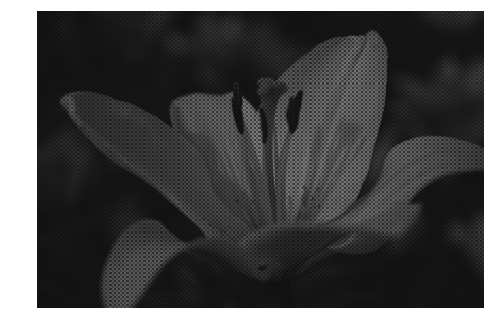

In [11]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

# raw_arrayの中のデータをグレースケールで表示します。
imshow(raw_array, cmap='gray')
# 軸を非表示にします。
plt.axis('off')
# 実際に表示します。
plt.show()

ここでmatplotlibはnumpy用描画ライブラリーです。その中でpyplotは各種グラフを表示するモジュールです。ここではpltという名前でインポートしています。

imshowは画像データを表示するコマンドです。

## RAW画像の確認

拡大して見てみましょう。

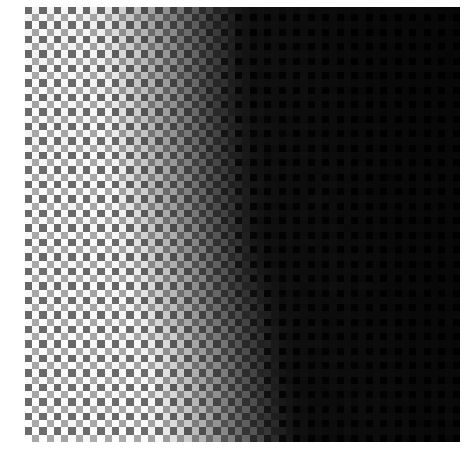

In [12]:
# pyplotのコマンドfigure()を使って表示サイズを調整.
# ここではfigsize=(8, 8)で、8inch x 8inchを指定（ただし実際の表示サイズはディスプレイ解像度に依存） 
plt.figure(figsize=(8, 8))

# RAW画像の中から(1310, 2620)から60x60の領域を表示。
imshow(raw_array[1310:1370, 2620:2680], cmap='gray')
# 軸非表示
plt.axis('off')
# 画像表示
plt.show()

  明るいところが緑、暗いところが赤や青の画素のはずです。
  
  Bayerの赤の部分を赤、青を青、緑を緑で表示してみましょう。

まず、RAW画像の配列を確認しておきます。

In [13]:
print(raw.raw_pattern)

[[0 1]
 [3 2]]


raw_patternはrawpyのアトリビュートで、Bayer配列の2x2行列を示します。

ここで、各番号と色の関係は以下のようになっています。カッコ内は略称です

| 番号 | 色 |
|--------|-----|
| 0 | 赤 (R) |
| 1 | 緑 (Gr) |
| 2 | 青 (B) |
| 3 | 緑 (Gb) |

ここで緑にGrとGbがあるのは、赤の行の緑と青の行の緑を区別するためです。カメラ画像処理では両者を区別することが多々あり、両者をGrとGbと表す事があります。

両者を区別する必要が無い場合はどちらもGであらわします。


この対応関係を考えると、この画像の各画素の色は、左上から

赤　緑

緑　青

のように並んでいることがわかります。これを図示するとこうなります。


![この画像のBayer配列](https://github.com/moizumi99/camera_raw_processing/raw/master/fig3_1_1.png)

では、これに対応するRGB画像を作ってみましょう。

In [0]:
# raw_arrayと同じ大きさで、３色のデータを持つnumpyの行列を作る。
# zerosは指定された大きさの０行列を作るコマンド。
raw_color = np.zeros((h, w, 3))

# 偶数列、偶数行の画素は赤なので、赤チャンネル（0）にコピー。
raw_color[0::2, 0::2, 0] = raw_array[0::2, 0::2]
# 奇数列、偶数行の画素は緑なので、緑チャンネル（1）にコピー。
raw_color[0::2, 1::2, 1] = raw_array[0::2, 1::2]
# 偶数列、奇数行の画素は緑なので、緑チャンネル（1）にコピー。
raw_color[1::2, 0::2, 1] = raw_array[1::2, 0::2]
# 奇数列、奇数行の画素は赤なので、青チャンネル（2）にコピー。
raw_color[1::2, 1::2, 2] = raw_array[1::2, 1::2]

# 0から1の範囲にノーマライズ
raw_color[raw_color < 0] = 0
# max()はnumpy行列の最大値を得る関数。
raw_color = raw_color / raw_color.max()

これでBayerに対応するRGB画像ができたはずです。表示してみましょう。

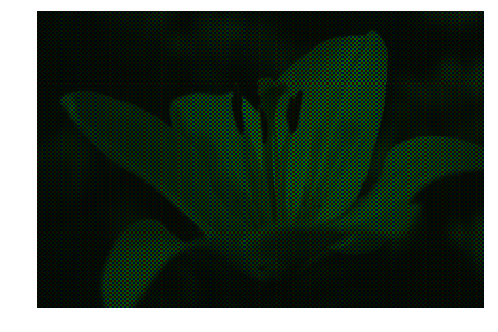

In [15]:
plt.figure(figsize=(8, 8))
# RAW画像表示。
imshow(raw_color)
# 軸非表示
plt.axis('off')
# 画像表示
plt.show()

さらに拡大してみます。

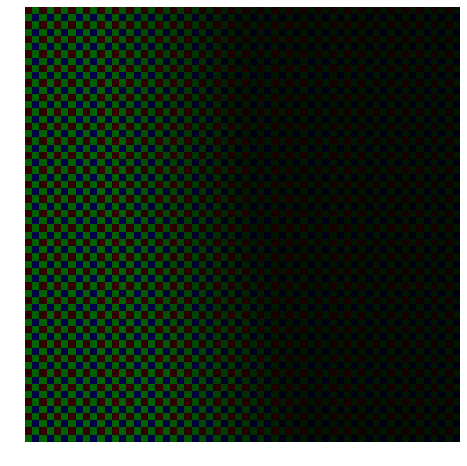

In [16]:
plt.figure(figsize=(8, 8))
# RAW画像の中から(1310, 2620)から60x60の領域を表示。
imshow(raw_color[1310:1370, 2620:2680])
# 軸非表示
plt.axis('off')
# 画像表示
plt.show()

これではなんだかよくわかりません。そういうわけでBayerをRGBに変換する処理が必用になるわけです。

## 簡易デモザイク処理

それではBayer配列からフルカラーの画像を作ってみましょう。

この処理はデモザイクと呼ばれることが多いです。本来デモザイクはカメラ画像処理プロセス（ISP)の肝になる部分で、画質のうち解像感や、偽色などの不快なアーティファクトなどを大きく左右します。 したがって手を抜くべきところではないのですが、今回は簡易処理なので、考えうる限りでもっとも簡単な処理を採用します。

その簡単な処理というのは、3色の情報を持つ最小単位の2x2のブロックから、1画素のみをとりだす、というものです。

![Bayer配列からRGB１画素への簡単な変換](https://github.com/moizumi99/camera_raw_processing/raw/master/fig2_2.png "Bayer配列からRGB１画素への簡単な変換")

結果として得られる画像サイズは1/4になりますが、もとが24Mもあるので、まだ6M残っていますので簡易処理としては十分でしょう。

なお、解像度低下をともなわないデモザイクアルゴリズムは応用編以降でとりあげます。


では、簡易デモザイク処理してみましょう。なお、2x2ピクセルの中に2画素ある緑は平均値をとります。

今回の処理では２つの緑画素は同じものとして扱うので、bayer配列を0, 1, 2で表しておきましょう。

In [17]:
bayer_pattern = raw.raw_pattern
# Bayer配列を0, 1, 2, 3から0, 1, 2表記に変更
bayer_pattern[bayer_pattern==3] = 1
# 表示して確認
print(bayer_pattern)

[[0 1]
 [1 2]]


では、2x2画素毎に平均をとってRGB画像を作ります。

In [0]:
# RGB画像を容易。サイズは縦横ともRAWデータの半分。
dms_img = np.zeros((h//2, w//2, 3))

# 各画素毎に処理.y, xはRAW画像での位置。
for y in range(0, h, 2):
    for x in range(0, w, 2):
        # bayer_pattern[0, 0]は2x2ブロックの左上の画素の色を示す
        dms_img[y // 2, x // 2, bayer_pattern[0, 0]] += raw_array[y + 0, x + 0]
        # bayer_pattern[0, 1]は2x2ブロックの右上の画素の色を示す
        dms_img[y // 2, x // 2, bayer_pattern[0, 1]] += raw_array[y + 0, x + 1]
        # bayer_pattern[1, 0]は2x2ブロックの左下の画素の色を示す
        dms_img[y // 2, x // 2, bayer_pattern[1, 0]] += raw_array[y + 1, x + 0]
        # bayer_pattern[1, 1]は2x2ブロックの右下の画素の色を示す
        dms_img[y // 2, x // 2, bayer_pattern[1, 1]] += raw_array[y + 1, x + 1]
        # 緑画素は２つあるので平均を取る
        dms_img[y // 2, x // 2, 1] /= 2

できあがった画像を見てみましょう。

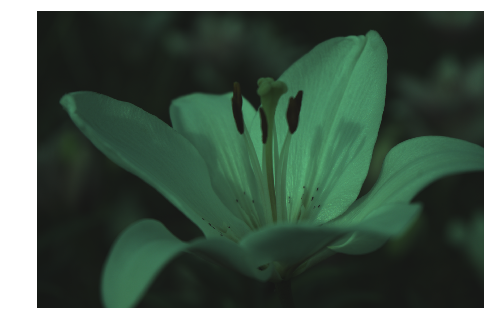

In [19]:
# 画像を0と1の間でノーマライズ
dms_img[dms_img < 0] = 0
dms_img = dms_img / dms_img.max()
# 表示
imshow(dms_img)
plt.axis('off')
plt.show()

このようにRGBのフルカラー画像を作ることができました。

まだ色が正しくない、全体的に暗い、などの問題があります。次の節でこのあたりを修正していきます。

## 処理の高速化

上記のコードは、画像処理とコードの対応がわかりやすいように各画素ごとの処理をループを使って記述してあります。

これは処理の内容はわかりやすいのですが、numpyの高速性を十分に活用しておらず、かなり遅い処理になっています。このコードをnumpyの機能を利用して書き直すとこのようになります。

In [0]:
# 出力画像の準備（上記処理と同じ）
dms_img = np.zeros((h//2, w//2, 3))

# raw_array[0::2, 0::2]は,偶数列、偶数業の画素。これを対応するdms_imgのチャンネルに足し合わせる
dms_img[:, :, bayer_pattern[0, 0]] = raw_array[0::2, 0::2]
dms_img[:, :, bayer_pattern[0, 1]] += raw_array[0::2, 1::2]
dms_img[:, :, bayer_pattern[1, 0]] += raw_array[1::2, 0::2]
dms_img[:, :, bayer_pattern[1, 1]] += raw_array[1::2, 1::2]
dms_img[:, :, 1] /= 2

処理の内容としては最初のループを使ったコードと同じですが、速度は格段に上がっています。

次節以降ではこの高速なコードを使用します。

## この節のまとめ

RAW画像をcolab上に読み込み、簡易デモザイク処理を行いました。